# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


# **Importing Datasets**

In [2]:
#data = pd.read_csv('/content/UNSW_NB15.csv')
data = pd.read_csv('C:/Users/Keshav/Desktop/datasets/UNSW/UNSW_NB15.csv')

In [3]:
#To display top 5 rows
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.001051,udp,dns,CON,2,2,146,178,2854.424439,...,1,2,0,0,0,2,5,0,Normal,0
1,2,3.267519,tcp,-,FIN,240,438,13766,548216,207.190838,...,1,4,0,0,0,8,8,0,Normal,0
2,3,0.043706,tcp,-,FIN,66,68,3926,57474,3043.060460,...,1,1,0,0,0,2,4,0,Normal,0
3,4,0.004850,tcp,ftp-data,FIN,14,6,8928,320,3917.525658,...,1,4,0,0,0,8,2,0,Normal,0
4,5,1.007710,tcp,http,FIN,12,18,1580,10168,28.778121,...,1,1,0,0,1,2,1,0,Normal,0


In [4]:
#Prints information (like No., data type, etc..) of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27855 entries, 0 to 27854
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 27855 non-null  int64  
 1   dur                27855 non-null  float64
 2   proto              27855 non-null  object 
 3   service            27855 non-null  object 
 4   state              27855 non-null  object 
 5   spkts              27855 non-null  int64  
 6   dpkts              27855 non-null  int64  
 7   sbytes             27855 non-null  int64  
 8   dbytes             27855 non-null  int64  
 9   rate               27855 non-null  float64
 10  sttl               27855 non-null  int64  
 11  dttl               27855 non-null  int64  
 12  sload              27855 non-null  float64
 13  dload              27855 non-null  float64
 14  sloss              27855 non-null  int64  
 15  dloss              27855 non-null  int64  
 16  sinpkt             278

In [5]:
# Selecting all the '-' values in the dataset in the service column
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
1,2,3.267519,tcp,-,FIN,240,438,13766,548216,207.190838,...,1,4,0,0,0,8,8,0,Normal,0
2,3,0.043706,tcp,-,FIN,66,68,3926,57474,3043.060460,...,1,1,0,0,0,2,4,0,Normal,0
5,6,0.027973,tcp,-,FIN,60,62,3598,48710,4325.599692,...,1,1,0,0,0,2,10,0,Normal,0
6,7,0.029838,tcp,-,FIN,40,42,2542,23508,2714.659206,...,1,1,0,0,0,2,6,0,Normal,0
8,9,0.000006,udp,-,INT,2,0,1066,0,166666.660800,...,1,13,0,0,0,3,13,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27845,27846,0.000003,sctp,-,INT,2,0,104,0,333333.321500,...,1,1,0,0,0,2,1,0,Exploits,1
27847,27848,1.177217,tcp,-,FIN,10,8,564,354,14.440838,...,1,1,0,0,0,3,1,0,Reconnaissance,1
27850,27851,0.000005,udp,-,INT,2,0,958,0,200000.005100,...,1,2,0,0,0,19,2,0,Fuzzers,1
27853,27854,0.000006,udp,-,INT,2,0,214,0,166666.660800,...,1,5,0,0,0,14,6,0,Fuzzers,1


In [6]:
# Replacing '-' that with Nan i.e Not A Number
data['service'].replace('-',np.nan,inplace=True)
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.001051,udp,dns,CON,2,2,146,178,2854.424439,...,1,2,0,0,0,2,5,0,Normal,0
1,2,3.267519,tcp,NaN,FIN,240,438,13766,548216,207.190838,...,1,4,0,0,0,8,8,0,Normal,0
2,3,0.043706,tcp,NaN,FIN,66,68,3926,57474,3043.060460,...,1,1,0,0,0,2,4,0,Normal,0
3,4,0.004850,tcp,ftp-data,FIN,14,6,8928,320,3917.525658,...,1,4,0,0,0,8,2,0,Normal,0
4,5,1.007710,tcp,http,FIN,12,18,1580,10168,28.778121,...,1,1,0,0,1,2,1,0,Normal,0


In [7]:
#returns the number of missing values in the data set
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              19854
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [8]:
#Tells us the shape of the dataframe (rows x column)
data.shape

(27855, 45)

In [9]:
#dropping all missing values from the dataset
data.dropna(inplace=True)

In [10]:
#Tells us the shape of the dataframe (rows x column)
data.shape

(8001, 45)

In [11]:
# Total count of all the different values in the column 'attack_cat' i.e the attack_category
data['attack_cat'].value_counts()

Normal            3833
Exploits          2810
Fuzzers            407
Reconnaissance     311
DoS                259
Generic            249
Analysis            87
Worms               23
Backdoor            22
Name: attack_cat, dtype: int64

In [12]:
# Counts total values of each kind in the column 'state'
data['state'].value_counts()

FIN    5972
CON    1642
INT     347
REQ      39
RST       1
Name: state, dtype: int64

In [13]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.001051,udp,dns,CON,2,2,146,178,2854.424439,...,1,2,0,0,0,2,5,0,Normal,0
3,4,0.004850,tcp,ftp-data,FIN,14,6,8928,320,3917.525658,...,1,4,0,0,0,8,2,0,Normal,0
4,5,1.007710,tcp,http,FIN,12,18,1580,10168,28.778121,...,1,1,0,0,1,2,1,0,Normal,0
7,8,0.000963,udp,dns,CON,2,2,146,178,3115.264802,...,1,1,0,0,0,2,1,0,Normal,0
9,10,1.455894,tcp,smtp,FIN,52,42,37492,3380,63.878277,...,1,1,0,0,0,3,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27846,27847,1.193514,tcp,ftp-data,FIN,8,8,364,834,12.567930,...,1,2,0,0,0,2,1,0,Exploits,1
27848,27849,2.313503,tcp,smtp,FIN,100,30,108776,2136,55.759599,...,1,1,0,0,0,1,1,0,Exploits,1
27849,27850,11.352599,tcp,smtp,FIN,38,32,20409,2296,6.077903,...,1,1,0,0,0,1,1,0,DoS,1
27851,27852,1.447352,tcp,http,FIN,10,10,862,2726,13.127421,...,1,1,0,0,1,14,1,0,Exploits,1


In [14]:
#features = pd.read_csv('/content/UNSW_NB15_features.csv')
features = pd.read_csv('C:/Users/Keshav/Desktop/datasets/UNSW/UNSW_NB15_features.csv')

In [15]:
#shows top 5 rows
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [16]:
#Convert strings in the Series/Index to lowercase
features['Type '] = features['Type '].str.lower()

In [17]:
# selecting column names of all data types i.e int, float, binary
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [18]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [19]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [20]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [21]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [22]:
#Prints information (like No., data type, etc..) of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8001 entries, 0 to 27852
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8001 non-null   int64  
 1   dur                8001 non-null   float64
 2   proto              8001 non-null   object 
 3   service            8001 non-null   object 
 4   state              8001 non-null   object 
 5   spkts              8001 non-null   int64  
 6   dpkts              8001 non-null   int64  
 7   sbytes             8001 non-null   int64  
 8   dbytes             8001 non-null   int64  
 9   rate               8001 non-null   float64
 10  sttl               8001 non-null   int64  
 11  dttl               8001 non-null   int64  
 12  sload              8001 non-null   float64
 13  dload              8001 non-null   float64
 14  sloss              8001 non-null   int64  
 15  dloss              8001 non-null   int64  
 16  sinpkt             8001

In [23]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.001051,udp,dns,CON,2,2,146,178,2854.424439,...,1,2,0,0,0,2,5,0,Normal,0
3,4,0.004850,tcp,ftp-data,FIN,14,6,8928,320,3917.525658,...,1,4,0,0,0,8,2,0,Normal,0
4,5,1.007710,tcp,http,FIN,12,18,1580,10168,28.778121,...,1,1,0,0,1,2,1,0,Normal,0
7,8,0.000963,udp,dns,CON,2,2,146,178,3115.264802,...,1,1,0,0,0,2,1,0,Normal,0
9,10,1.455894,tcp,smtp,FIN,52,42,37492,3380,63.878277,...,1,1,0,0,0,3,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27846,27847,1.193514,tcp,ftp-data,FIN,8,8,364,834,12.567930,...,1,2,0,0,0,2,1,0,Exploits,1
27848,27849,2.313503,tcp,smtp,FIN,100,30,108776,2136,55.759599,...,1,1,0,0,0,1,1,0,Exploits,1
27849,27850,11.352599,tcp,smtp,FIN,38,32,20409,2296,6.077903,...,1,1,0,0,0,1,1,0,DoS,1
27851,27852,1.447352,tcp,http,FIN,10,10,862,2726,13.127421,...,1,1,0,0,1,14,1,0,Exploits,1


# **Data Visualization**

## **Binary Classification**

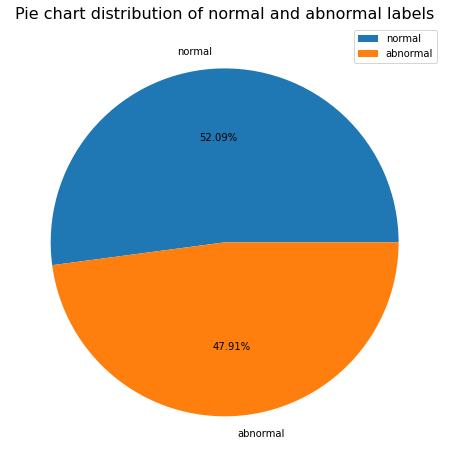

In [24]:
# plotting normal and abnormal labels (binary clssification) on a piechart
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('C:/Users/Keshav/Desktop/datasets/plots/Pie_chart_binary.png')
plt.show()

# **One hot encoding**

In [25]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [26]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
0,udp,dns,CON
3,tcp,ftp-data,FIN
4,tcp,http,FIN
7,udp,dns,CON
9,tcp,smtp,FIN


In [27]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [28]:
# Categorical dataframe top 5 rows
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [29]:
# Tells us the shape of the dataframe (rows x column)
data.shape

(8001, 45)

In [30]:
# concatenating or joining data and categorical_data
data = pd.concat([data, data_cat],axis=1)

In [31]:
#Tells us the shape of the dataframe (rows x column)
data.shape

(8001, 64)

In [32]:
# dropping the null/non-numeric data
data.drop(columns=cat_col,inplace=True)

In [33]:
data.shape

(8001, 61)

# **Data Normalization**


In [34]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [35]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [36]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.001051,2,2,146,178,2854.424439,31,29,5.556613e+05,...,0,0,0,0,0,1,0,0,0,0
3,4,0.004850,14,6,8928,320,3917.525658,31,29,1.367588e+07,...,0,0,0,0,0,0,1,0,0,0
4,5,1.007710,12,18,1580,10168,28.778121,31,29,1.150331e+04,...,0,0,0,0,0,0,1,0,0,0
7,8,0.000963,2,2,146,178,3115.264802,31,29,6.064382e+05,...,0,0,0,0,0,1,0,0,0,0
9,10,1.455894,52,42,37492,3380,63.878277,31,29,2.020532e+05,...,0,1,0,0,0,0,1,0,0,0


In [37]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [38]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000018,0.000000,0.000624,0.000005,0.000041,0.002854,0.0,0.115079,0.000723,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.000081,0.001661,0.001871,0.000917,0.000074,0.003917,0.0,0.115079,0.017807,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.016796,0.001384,0.005614,0.000154,0.002336,0.000029,0.0,0.115079,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,8,0.000016,0.000000,0.000624,0.000005,0.000041,0.003115,0.0,0.115079,0.000790,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,10,0.024266,0.006921,0.013100,0.003884,0.000777,0.000064,0.0,0.115079,0.000263,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Label Encoding**

## **Binary Labels**

In [39]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [40]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [41]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [42]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [43]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

# **Feature Selection**

## **Binary Labels**

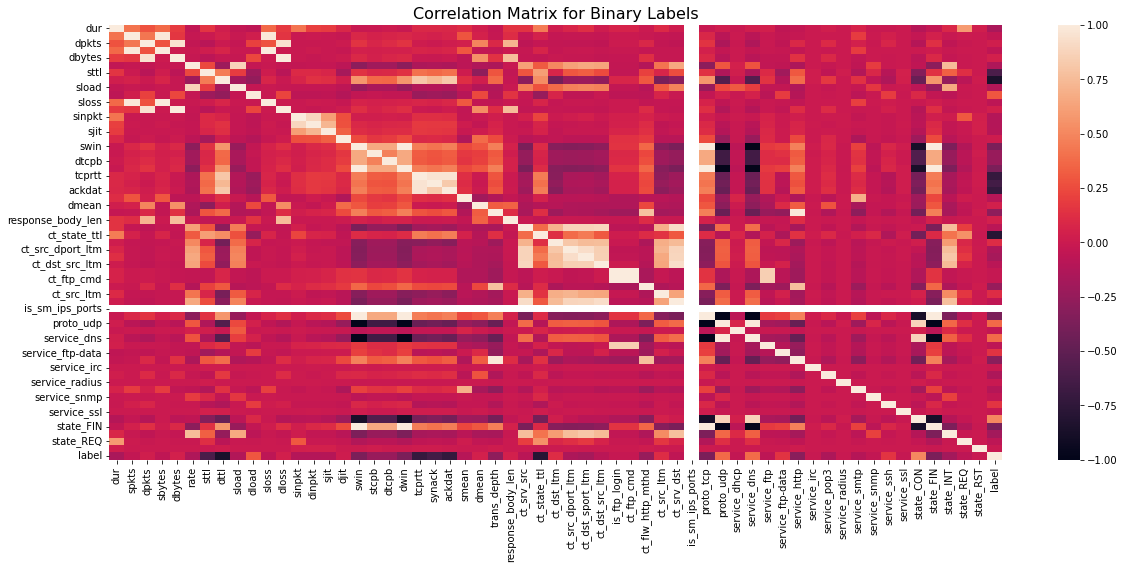

In [44]:
#Correlation between features of dataset
num_col.append('label')

plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('C:/Users/Keshav/Desktop/datasets/plots/correlation_matrix_bin.png')
plt.show()

In [45]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

service_http    0.305970
state_FIN       0.367447
swin            0.369798
dwin            0.369798
proto_tcp       0.369798
proto_udp       0.369798
service_dns     0.378254
state_CON       0.504492
sttl            0.605469
synack          0.640952
tcprtt          0.713798
ackdat          0.724457
ct_state_ttl    0.790852
dttl            0.855230
label           1.000000
Name: label, dtype: float64

In [46]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['sttl', 'dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'proto_tcp', 'proto_udp', 'service_dns', 'service_http',
       'state_CON', 'state_FIN', 'label'],
      dtype='object')

In [47]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,sttl,dttl,swin,dwin,tcprtt,synack,ackdat,ct_state_ttl,proto_tcp,proto_udp,service_dns,service_http,state_CON,state_FIN,label
0,0.000000,0.115079,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1
3,0.000000,0.115079,1.0,1.0,0.000954,0.001731,0.000343,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.000000,0.115079,1.0,1.0,0.001038,0.001876,0.000380,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,1
7,0.000000,0.115079,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1
9,0.000000,0.115079,1.0,1.0,0.001760,0.003416,0.000460,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27846,0.139013,1.000000,1.0,1.0,0.215345,0.168467,0.252133,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0
27848,0.139013,1.000000,1.0,1.0,0.354114,0.364439,0.346011,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0
27849,0.139013,1.000000,1.0,1.0,0.356442,0.489339,0.252148,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0
27851,0.139013,1.000000,1.0,1.0,0.207658,0.259911,0.166652,0.166667,1.0,0.0,0.0,1.0,0.0,1.0,0


### **Saving Prepared Dataset to Disk**

In [48]:
bin_data.to_csv('C:/Users/Keshav/Desktop/datasets/bin_data.csv')

### **Saving Prepared Dataset to Disk**

# **BINARY CLASSIFICATION**

## **Data Splitting**



In [49]:
#training and testing data split
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=50)

## **Support Vector Machine**

In [51]:
#model SVM
lsvm_bin = SVC(C=10,kernel='linear',gamma='auto') 
lsvm_bin.fit(X_train,y_train)

SVC(C=10, gamma='auto', kernel='linear')

In [52]:
y_pred = lsvm_bin.predict(X_test)

In [53]:
#Actual Data vs Predicted Data
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_bin_df.to_csv('./predictions/lsvm_real_pred_bin.csv')
lsvm_bin_df

,Actual,Predicted
12004,0,0
16536,1,0
14348,1,1
493,1,1
9355,0,0
...,...,...
3528,1,1
19331,0,0
15250,1,1
16550,1,1


In [54]:
#Accuracy Score
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.015410245730945439
Mean Squared Error -  0.015410245730945439
Root Mean Squared Error -  0.12413801082241264
R2 Score -  93.92431441193632
Accuracy -  98.45897542690545


In [55]:
# Class Report
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99      1240
      normal       1.00      0.97      0.98      1161

    accuracy                           0.98      2401
   macro avg       0.99      0.98      0.98      2401
weighted avg       0.99      0.98      0.98      2401



### **Actual and Predicted Data**

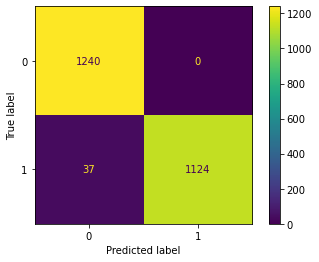

In [56]:
#Confusion matrix for svm
predictions = lsvm_bin.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=lsvm_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lsvm_bin.classes_)
disp.plot()
plt.show()

### **Plot between Actual and Predicted Data**

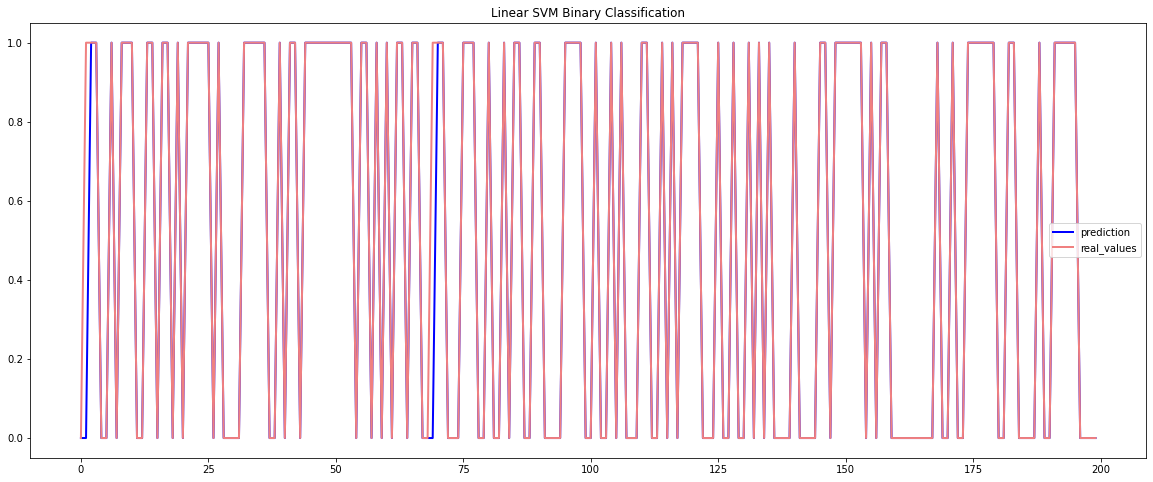

In [57]:
#Plot
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Binary Classification")
plt.savefig('plots/lsvm_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [58]:
#Saving model as pickle file
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Random Forest Classifier**

In [59]:
 rf_bin = RandomForestClassifier(random_state=0,max_depth=1)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, random_state=0)

In [60]:
y_pred = rf_bin.predict(X_test)

In [61]:
# Accuracy Score
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06705539358600583
Mean Squared Error -  0.06705539358600583
Root Mean Squared Error -  0.25895056204999023
R2 Score -  73.674529743547
Accuracy -  93.29446064139941


In [62]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      0.90      0.93      1240
      normal       0.90      0.97      0.93      1161

    accuracy                           0.93      2401
   macro avg       0.93      0.93      0.93      2401
weighted avg       0.94      0.93      0.93      2401



### **Actual and Predicted Data**

In [63]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('C:/Users/Keshav/Desktop/datasets/predictions/rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
12004,0,0
16536,1,0
14348,1,1
493,1,1
9355,0,0
...,...,...
3528,1,1
19331,0,0
15250,1,1
16550,1,1


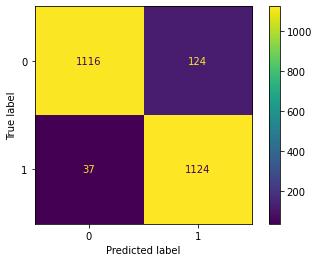

In [64]:
# Confusion matrix for rf
predictions = rf_bin.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_bin.classes_)
disp.plot()
plt.show()

### **Plot between Actual and Predicted Data**

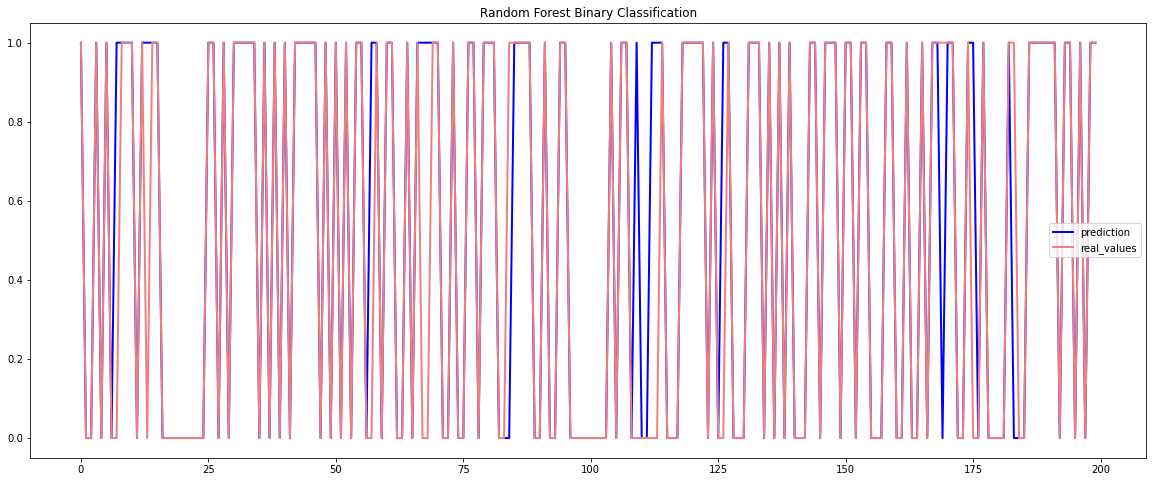

In [65]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('C:/Users/Keshav/Desktop/datasets/plots/rf_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [66]:
pkl_filename = "C:/Users/Keshav/Desktop/datasets/models/random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Decision Tree Classifier**

In [73]:
dt_bin = DecisionTreeClassifier(random_state=50,splitter="random",criterion='entropy')
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50, splitter='random')

In [74]:
y_pred = dt_bin.predict(X_test)

In [75]:
#Accuracy Score
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.026239067055393587
Mean Squared Error -  0.026239067055393587
Root Mean Squared Error -  0.16198477414681167
R2 Score -  89.49640187824734
Accuracy -  97.37609329446065


In [76]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      0.98      0.97      1240
      normal       0.98      0.97      0.97      1161

    accuracy                           0.97      2401
   macro avg       0.97      0.97      0.97      2401
weighted avg       0.97      0.97      0.97      2401



### **Actual and Predicted Data**

In [77]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('C:/Users/Keshav/Desktop/datasets/predictions/dt_real_pred_bin.csv')
dt_bin_df

,Actual,Predicted
12004,0,0
16536,1,0
14348,1,1
493,1,1
9355,0,0
...,...,...
3528,1,1
19331,0,0
15250,1,1
16550,1,1


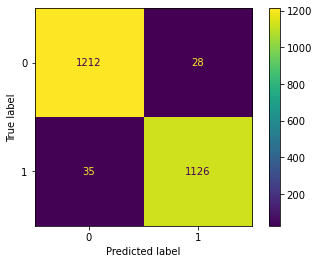

In [78]:
#Confusion matrix for dt
predictions = dt_bin.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=dt_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_bin.classes_)
disp.plot()
plt.show()

### **Plot between Actual and Predicted Data**

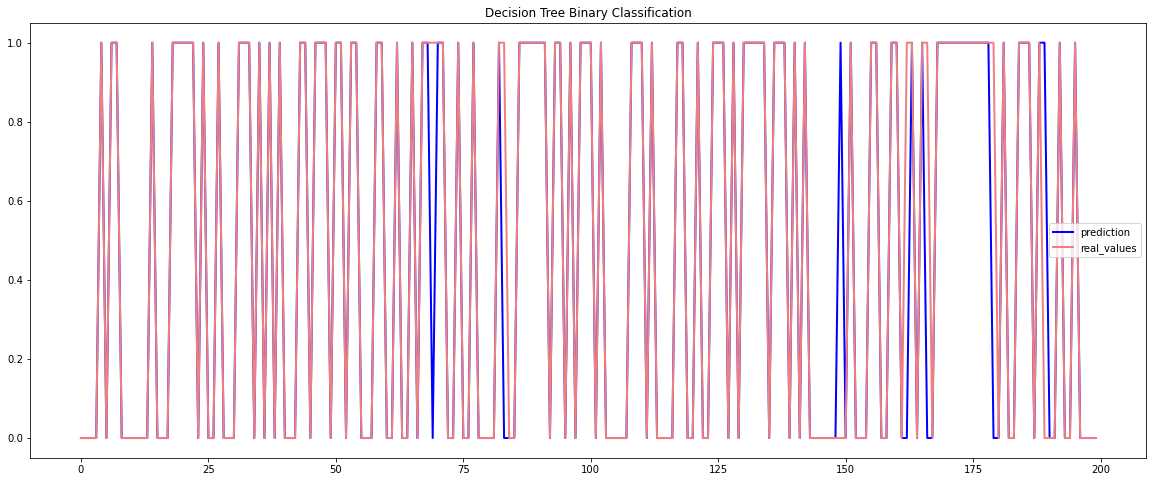

In [79]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('C:/Users/Keshav/Desktop/datasets/plots/dt_real_pred_bin.png')
plt.show()

### **Saving Trained Model to Disk**

In [75]:
pkl_filename = "C:/Users/Keshav/Desktop/datasets/models/decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk
